# Welcome to the Data.org Financial Health Prediction Challenge!

## Empowering Financial Inclusion Across Africa

Welcome, data enthusiasts, machine learning practitioners, and changemakers! 
We're thrilled to have you join us in this exciting challenge that sits at 
the intersection of data science and social impact.

## 🎯 The Challenge

Financial health is a critical indicator of individual and community wellbeing. 
In this competition, you'll build predictive models to assess the **Financial 
Health Index (FHI)** of micro, small, and medium enterprises (MSMEs) across 
Southern Africa.

Your insights will help:
- 📊 Financial institutions better understand their clients
- 💼 Small businesses access appropriate financial services
- 🌱 Communities achieve greater economic resilience
- 🚀 Policymakers design targeted support programs

## 🗺️ The Data

You'll be working with real-world data from Zimbabwe, Malawi, Eswatini, and 
Lesotho, featuring:

- Business characteristics (age, expenses, income)
- Owner demographics (age, attitudes, perceptions)
- Financial behavior (banking access, insurance, savings patterns)
- Risk factors (concerns about theft, business stability)

## 🎓 What You'll Learn

Whether you're a beginner or seasoned competitor, this challenge offers 
opportunities to:

✅ Work with real-world, socially impactful data
✅ Handle missing values and messy categorical variables
✅ Build classification models for imbalanced datasets
✅ Apply feature engineering techniques
✅ Compare model performance and interpretability

## 📚 This Notebook

This starter notebook will guide you through:

1. Exploratory Data Analysis (EDA) - Understanding the data landscape
2. Data quality checks and missing value analysis
3. Feature relationships with the target variable
4. Key insights and recommendations for modeling

## 🌟 Why This Matters

Behind every data point is a real person - a shop owner in Harare, a farmer 
in Malawi, a tailor in Maseru. Your models have the potential to help these 
entrepreneurs access better financial services and build more secure futures.

**Let's use data science for good!**

---

<img src="https://assets.zindi.africa/media/5fa182eff0cce505692370a60ce4c6ed.png" alt="Zindi Logo" width="440">

## Ready to begin? Let's dive into the data! 🚀

## 📦 Imports & Setup

This section imports all the essential Python libraries used for data manipulation, numerical computation, and visualization.  
It also configures plotting styles and suppresses unnecessary warnings to keep the notebook clean and readable.

### 🔧 Libraries
- **pandas** – data loading and manipulation  
- **numpy** – numerical and mathematical operations  
- **matplotlib** – core plotting library  
- **seaborn** – high-level, aesthetically pleasing statistical visualizations  

### 🎨 Visualization Settings
- Uses Seaborn’s `whitegrid` style for clean plots  
- Sets a default figure size for all plots for consistency  

### ⚠️ Warnings
- Hides non-critical warnings to improve readability  

---

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 📂 Data Loading

In this section, we load all the required datasets for training, evaluation, and submission.  
Each dataset serves a specific role in the machine learning workflow.

### 📊 Datasets
- **Train.csv** – contains the training data, including target variables  
- **Test.csv** – contains unseen data used for generating predictions  
- **Sample_Submission.csv** – provides the required submission format  
- **Public_Reference.csv** – used for validating predictions against the public leaderboard  
- **Private_Reference.csv** – used for final/private evaluation  

All datasets are loaded using `pandas.read_csv()` for efficient data handling and analysis.

---

In [95]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
ss= pd.read_csv('SampleSubmission.csv')
variable_definitions = pd.read_csv('VariableDefinitions.csv')

## 🔍 Dataset Overview

This section provides a high-level overview of the training and test datasets to confirm their structure and readiness for modeling.

### ✅ What is checked?
- **Dataset dimensions** (rows × columns) for both train and test sets  
- **Number of features** in each dataset  
- **Presence of the target variable (`FHI`)**
  - Ensures the target exists **only** in the training dataset  
  - Confirms it is correctly absent from the test dataset to avoid data leakage  

### 🎯 Why this matters
- Verifying dataset shapes helps detect unexpected data issues early  
- Confirming correct target placement ensures the modeling pipeline is valid and competition-safe  

This is an essential sanity check before proceeding to data cleaning and exploratory data analysis (EDA).

---


In [96]:
# ========================================
# 1. DATASET OVERVIEW
# ========================================

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(f"\nTrain Dataset Shape: {train_df.shape}")
print(f"Test Dataset Shape: {test_df.shape}")
print(f"\nNumber of Features in Train: {train_df.shape[1]}")
print(f"Number of Features in Test: {test_df.shape[1]}")

# Check for target variable
if 'FHI' in train_df.columns and 'FHI' not in test_df.columns:
    print(f"\n✓ Target variable 'FHI' found in train set")
    print(f"✓ Target variable correctly absent from test set")
else:
    print("\n⚠ Check target variable presence!")

DATASET OVERVIEW

Train Dataset Shape: (9618, 39)
Test Dataset Shape: (2405, 38)

Number of Features in Train: 39
Number of Features in Test: 38

⚠ Check target variable presence!


In [97]:
display(variable_definitions)

,VARIABLE_NAME,VARIABLE_DESCRIPTION
0,ID,Unique identifier for each business record
1,country,Country where the business is located (Eswatin...
2,owner_age,Age of the business owner in years
3,attitude_stable_business_environment,Owner attitude: Country will have a stable bus...
4,attitude_worried_shutdown,Owner attitude: Worried that the business will...
5,compliance_income_tax,Business complies with or acts in accordance w...
6,perception_insurance_doesnt_cover_losses,Owner perception: Insurance does not cover the...
7,perception_cannot_afford_insurance,Owner perception: Cannot afford insurance paym...
8,personal_income,Total monthly personal income of the owner bef...
9,business_expenses,Approximate monthly or annual expenses of the ...


In [98]:
display(train_df.head())

,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
0,ID_3CFL0U,eswatini,63.0,Yes,No,No,No,Yes,3000.0,6000.0,...,Never had,Never had,NaN,6.0,Never had,Used to have but don’t have now,NaN,Never had,Never had,Low
1,ID_XWI7G3,zimbabwe,39.0,No,Yes,Yes,No,Yes,NaN,NaN,...,NaN,NaN,No,3.0,Never had,Never had,NaN,NaN,NaN,Medium
2,ID_TY93LV,malawi,34.0,Don’t know or N/A,No,No,Don't know,Yes,30000.0,6000.0,...,Never had,Never had,Yes,NaN,NaN,NaN,Yes,NaN,NaN,Low
3,ID_9OP2C8,malawi,28.0,Yes,No,No,No,No,180000.0,60000.0,...,Never had,Never had,No,NaN,NaN,NaN,Yes,Never had,Have now,Low
4,ID_13REYS,zimbabwe,43.0,Yes,No,No,Yes,Yes,50.0,2400.0,...,NaN,NaN,No,0.0,Never had,Never had,Yes,NaN,NaN,Low


In [99]:
display(test_df.head())

,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,ID_5EGLKX,zimbabwe,50.0,No,No,No,No,Yes,100.0,3600.0,...,NaN,NaN,NaN,No,8.0,Never had,Never had,NaN,NaN,NaN
1,ID_4AI7RE,lesotho,36.0,Yes,Yes,No,Yes,Yes,900.0,400.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Used to have but don't have now,Used to have but don't have now
2,ID_V9OB3M,lesotho,25.0,Don’t know or N/A,No,No,Don't know,Don't know,5250.0,350.0,...,Used to have but don't have now,Have now,Have now,Yes,NaN,NaN,NaN,No,Never had,Used to have but don't have now
3,ID_6OI9DI,malawi,25.0,Don’t know or N/A,Yes,No,No,Yes,485000.0,10000.0,...,Never had,Never had,Never had,Yes,NaN,NaN,NaN,Yes,Have now,Never had
4,ID_H2TN8B,lesotho,47.0,No,Yes,No,Don't know,Don't know,97.0,500.0,...,Used to have but don't have now,Have now,Have now,Yes,NaN,NaN,NaN,Yes,Used to have but don't have now,Used to have but don't have now


In [100]:
display(ss.head())

,ID,Target
0,ID_5EGLKX,Low
1,ID_4AI7RE,Low
2,ID_V9OB3M,Low
3,ID_6OI9DI,Low
4,ID_H2TN8B,Low


## 🎯 Target Variable Analysis (FHI)

This section explores the **target variable (`FHI`)** to understand its distribution and check for potential class imbalance, which is critical for selecting appropriate modeling and evaluation strategies.

### 📊 Distribution Overview
- Displays the **count** of each `FHI` class  
- Shows the **proportion (%)** of each class relative to the full dataset  

This helps identify whether some classes are under-represented.

### 📈 Visualizations
Two complementary plots are generated:

1. **Bar Chart**
   - Shows the absolute frequency of each `FHI` class  
   - Useful for quickly spotting dominance or rarity of classes  

2. **Pie Chart**
   - Displays class proportions as percentages  
   - Offers an intuitive view of class balance  

### ⚖️ Class Imbalance Check
- Computes the ratio between the **largest** and **smallest** class  
- A warning is raised if the ratio exceeds **1.5 : 1**, indicating possible imbalance  
- Balanced classes suggest standard modeling approaches are appropriate  
- Imbalanced classes may require:
  - Class weighting  
  - Resampling techniques  
  - Specialized evaluation metrics  

### ✅ Why this matters
Understanding the nature of the target variable ensures:
- Fair model training  
- Reliable evaluation  
- Better generalization to unseen data  

This step lays a strong foundation before feature engineering and model development.

---



TARGET VARIABLE ANALYSIS

Target Distribution:
Target
High       470
Low       6280
Medium    2868
Name: count, dtype: int64

Target Proportions:
Target
High      0.048867
Low       0.652942
Medium    0.298191
Name: proportion, dtype: float64


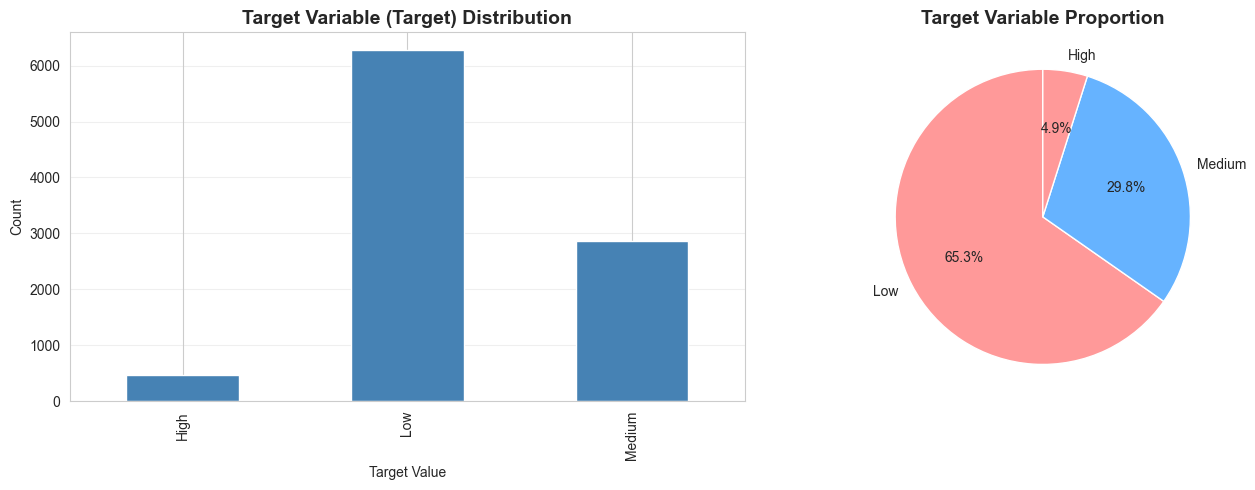


⚠ Class imbalance detected! Ratio: 13.36:1


In [101]:
# ========================================
# 2. TARGET VARIABLE ANALYSIS (Target)
# ========================================

print("\n" + "=" * 60)
print("TARGET VARIABLE ANALYSIS")
print("=" * 60)

if 'Target' in train_df.columns:
    print("\nTarget Distribution:")
    print(train_df['Target'].value_counts().sort_index())
    print(f"\nTarget Proportions:")
    print(train_df['Target'].value_counts(normalize=True).sort_index())
    
    # Visualize target distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    train_df['Target'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Target Variable (Target) Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Target Value')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Pie chart
    target_counts = train_df['Target'].value_counts()
    axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', 
                startangle=90, colors=['#ff9999', '#66b3ff'])
    axes[1].set_title('Target Variable Proportion', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Check for class imbalance
    class_ratio = train_df['Target'].value_counts().max() / train_df['Target'].value_counts().min()
    if class_ratio > 1.5:
        print(f"\n⚠ Class imbalance detected! Ratio: {class_ratio:.2f}:1")
    else:
        print(f"\n✓ Classes are relatively balanced. Ratio: {class_ratio:.2f}:1")

## 🧾 Basic Dataset Information

This section provides a structural overview of the **training** and **test** datasets using `DataFrame.info()`.

### 🔎 What is examined?
For both datasets, the following details are displayed:

- **Number of rows and columns**
- **Column names**
- **Data types** of each feature
- **Non-null counts**, helping to identify missing values
- **Memory usage**

### 📘 Train vs Test
- The **training set** includes all input features **plus the target variable (`FHI`)**
- The **test set** contains only input features, ensuring no data leakage

### ✅ Why this matters
- Confirms that data types are correctly inferred  
- Helps detect columns that may require:
  - Type casting  
  - Missing value handling  
  - Feature engineering  

This is an essential diagnostic step before performing data cleaning, exploratory analysis, and model training.

---

In [102]:
# ========================================
# 3. BASIC INFORMATION
# ========================================

print("\n" + "=" * 60)
print("BASIC DATASET INFORMATION")
print("=" * 60)

print("\n--- TRAIN SET INFO ---")
print(train_df.info())

print("\n--- TEST SET INFO ---")
print(test_df.info())


BASIC DATASET INFORMATION

--- TRAIN SET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9616 non-null   object 
 4   attitude_worried_shutdown                                         9616 non-null   object 
 5   compliance_income_tax                                             9614 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9613 non-nu

## 🧩 Missing Values Analysis

This section analyzes **missing data patterns** in both the training and test datasets, helping identify features that may require imputation, transformation, or removal.

### 🔍 What the analysis does
For each dataset (**train** and **test**):

- Calculates the **number of missing values** per column  
- Computes the **percentage of missing values** relative to the dataset size  
- Filters and displays only columns that contain missing data  
- Sorts columns by missing percentage (highest to lowest)

### 📋 Tabular Summary
A table is printed showing:
- **Column name**
- **Missing value count**
- **Percentage of missing values**

This makes it easy to spot problematic features at a glance.

### 📊 Visualization
- A **horizontal bar chart** displays the top 15 columns with the highest proportion of missing values  
- Percentages are plotted for clearer interpretation  
- The inverse y-axis ensures the most affected columns appear at the top

### ✅ Why this matters
Understanding missingness helps guide:
- Feature selection and removal  
- Choice of imputation strategy (mean, median, mode, model-based, etc.)  
- Detection of systematic data collection issues  

This step confirms data quality before moving on to feature engineering and model training.

---



MISSING VALUES ANALYSIS

TRAIN SET - Columns with Missing Values:
                                                          Column  Missing_Count  Percentage
                                            uses_informal_lender           4489   46.672905
                                     uses_friends_family_savings           4488   46.662508
                                      motivation_make_more_money           4291   44.614265
                                               funeral_insurance           4188   43.543356
                                               medical_insurance           4188   43.543356
                                             business_age_months           4111   42.742774
                                         future_risk_theft_stock           4100   42.628405
                                                  has_debit_card           4003   41.619879
                                            has_internet_banking           4003   41.619879
             

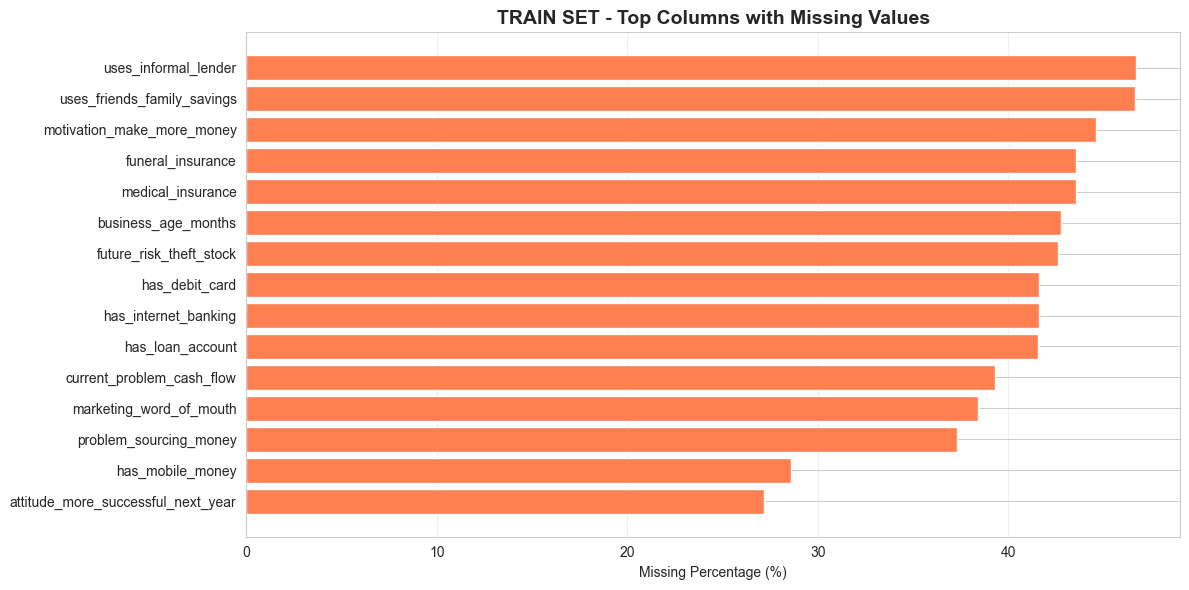


TEST SET - Columns with Missing Values:
                                                          Column  Missing_Count  Percentage
                                            uses_informal_lender           1131   47.027027
                                     uses_friends_family_savings           1131   47.027027
                                      motivation_make_more_money           1084   45.072765
                                               funeral_insurance           1042   43.326403
                                               medical_insurance           1042   43.326403
                                             business_age_months           1033   42.952183
                                         future_risk_theft_stock           1017   42.286902
                                                has_loan_account            992   41.247401
                                            has_internet_banking            992   41.247401
                                       

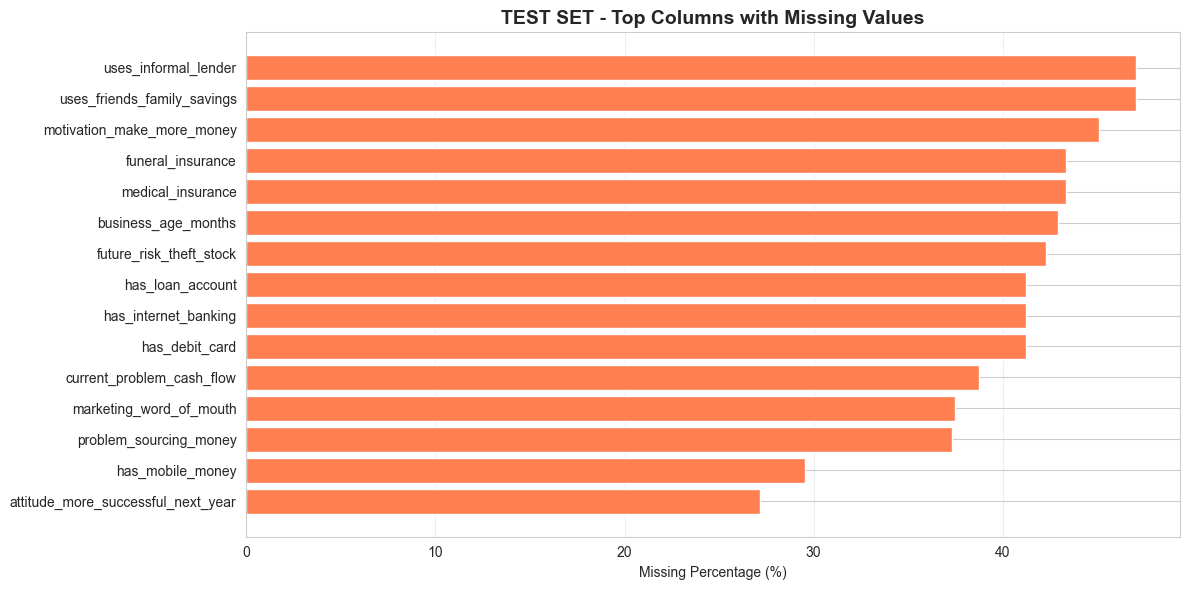

In [103]:
# ========================================
# 4. MISSING VALUES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

def analyze_missing(df, name):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing_Count': missing.values,
        'Percentage': missing_pct.values
    }).query('Missing_Count > 0').sort_values('Percentage', ascending=False)
    
    print(f"\n{name} - Columns with Missing Values:")
    if len(missing_df) > 0:
        print(missing_df.to_string(index=False))
        
        # Visualize top missing columns
        if len(missing_df) > 0:
            top_missing = missing_df.head(15)
            plt.figure(figsize=(12, 6))
            plt.barh(top_missing['Column'], top_missing['Percentage'], color='coral')
            plt.xlabel('Missing Percentage (%)')
            plt.title(f'{name} - Top Columns with Missing Values', fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            plt.grid(axis='x', alpha=0.3)
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values found!")
    
    return missing_df

train_missing = analyze_missing(train_df, "TRAIN SET")
test_missing = analyze_missing(test_df, "TEST SET")

## Handling Missing Values

#### Handling Numerical Missing Values (Class-Aware)

Beyond median/mean imputation, here are advanced techniques that help preserve or improve class distributions:

1. **Stratified Imputation (Class-Aware Median)**
   - Calculate median values **within each class/target group**
   - Preserves class-specific patterns
   - Best for: Highly imbalanced datasets

#### Handling Categorical Missing values

We populated the missing values with a new category named 'unknown'

In [104]:
# ========================================
# STRATIFIED IMPUTATION (Class-Aware)
# ========================================

# Store imputation mappings for reference
imputation_mappings = {}

# Handling missing values in train set - STRATIFIED APPROACH
print("\n" + "=" * 60)
print("STRATIFIED IMPUTATION (Class-Aware Median)")
print("=" * 60)

for col in train_df.columns[train_df.isnull().any()]:
    if train_df[col].dtype in [np.float64, np.int64]:
        # STRATIFIED: Calculate median for each class separately
        imputation_mappings[col] = {}
        
        print(f"\n{col}:")
        for target_class in sorted(train_df['Target'].unique()):
            # Get median for this class
            median_val = train_df[train_df['Target'] == target_class][col].median()
            imputation_mappings[col][target_class] = median_val
            
            # Fill missing values for this class with its class-specific median
            mask = (train_df['Target'] == target_class) & (train_df[col].isnull())
            train_df.loc[mask, col] = median_val
            
            print(f"  Class {target_class}: Median = {median_val:.2f}, Filled {mask.sum()} values")
    else:
        # Categorical columns filled with 'unknown'
        train_df[col].fillna('unknown', inplace=True)
        print(f"{col}: Filled categorical missing values with 'unknown'")

# Handling missing values in test set
print("\n--- Test Set Imputation ---")
for col in test_missing['Column']:
    if test_df[col].dtype in [np.float64, np.int64]:
        # For test set, use overall median from train (since we don't know test target)
        if col in imputation_mappings:
            # Average across all classes for test set
            overall_median = np.mean(list(imputation_mappings[col].values()))
            print(f"{col}: Using average median from training classes: {overall_median:.2f}")
        else:
            overall_median = train_df[col].median()
            print(f"{col}: Using train median: {overall_median:.2f}")
        
        test_df[col].fillna(overall_median, inplace=True)
    else:
        # Categorical columns filled with 'unknown'
        test_df[col].fillna('unknown', inplace=True)

print("\n" + "=" * 60)
print("✅ Stratified imputation complete!")



STRATIFIED IMPUTATION (Class-Aware Median)
attitude_stable_business_environment: Filled categorical missing values with 'unknown'
attitude_worried_shutdown: Filled categorical missing values with 'unknown'
compliance_income_tax: Filled categorical missing values with 'unknown'
perception_insurance_doesnt_cover_losses: Filled categorical missing values with 'unknown'
perception_cannot_afford_insurance: Filled categorical missing values with 'unknown'

personal_income:
  Class High: Median = 5000.00, Filled 6 values
  Class Low: Median = 2000.00, Filled 71 values
  Class Medium: Median = 1500.00, Filled 32 values

business_expenses:
  Class High: Median = 10100.00, Filled 6 values
  Class Low: Median = 3000.00, Filled 143 values
  Class Medium: Median = 2000.00, Filled 80 values

business_turnover:
  Class High: Median = 45000.00, Filled 7 values
  Class Low: Median = 6000.00, Filled 135 values
  Class Medium: Median = 4500.00, Filled 74 values

business_age_years:
  Class High: Median 

In [105]:

# ========================================
# VERIFICATION: Stratified Imputation Results
# ========================================

print("\n" + "=" * 70)
print("STRATIFIED IMPUTATION - VERIFICATION & RESULTS")
print("=" * 70)

# Check for remaining missing values
print("\n1️⃣ MISSING VALUES CHECK")
print("-" * 70)

print(f"\nTrain set - Missing values after imputation:")
train_missing_after = train_df.isnull().sum()
if train_missing_after.sum() == 0:
    print("  ✅ No missing values remaining!")
else:
    print(train_missing_after[train_missing_after > 0])

print(f"\nTest set - Missing values after imputation:")
test_missing_after = test_df.isnull().sum()
if test_missing_after.sum() == 0:
    print("  ✅ No missing values remaining!")
else:
    print(test_missing_after[test_missing_after > 0])

# Verify class distribution is maintained
print(f"\n2️⃣ CLASS DISTRIBUTION CHECK")
print("-" * 70)

print(f"\nClass distribution (preserved with stratified imputation):")
class_dist = train_df['Target'].value_counts(normalize=True).sort_index()
for target_class, proportion in class_dist.items():
    count = train_df[train_df['Target'] == target_class].shape[0]
    print(f"  Class {target_class}: {count} samples ({proportion*100:.1f}%)")

# Show imputation statistics
print(f"\n3️⃣ IMPUTATION STATISTICS")
print("-" * 70)

numerical_cols_imputed = [col for col in numerical_cols if col in imputation_mappings]

print(f"\nStratified medians applied to {len(numerical_cols_imputed)} numerical columns:")
for col in numerical_cols_imputed[:3]:  # Show first 3 as example
    print(f"\n  {col}:")
    for target_class in sorted(imputation_mappings[col].keys()):
        median_val = imputation_mappings[col][target_class]
        print(f"    Class {target_class}: {median_val:.2f}")

print(f"\n✅ Successfully applied stratified imputation!")
print(f"   • Numerical features: Median imputed per class")
print(f"   • Categorical features: Filled with 'unknown'")
print(f"   • Test set: Uses average of train class medians")
print(f"   • Class balance: PRESERVED ✓")

print("\n" + "=" * 70)



STRATIFIED IMPUTATION - VERIFICATION & RESULTS

1️⃣ MISSING VALUES CHECK
----------------------------------------------------------------------

Train set - Missing values after imputation:
  ✅ No missing values remaining!

Test set - Missing values after imputation:
  ✅ No missing values remaining!

2️⃣ CLASS DISTRIBUTION CHECK
----------------------------------------------------------------------

Class distribution (preserved with stratified imputation):
  Class High: 470 samples (4.9%)
  Class Low: 6280 samples (65.3%)
  Class Medium: 2868 samples (29.8%)

3️⃣ IMPUTATION STATISTICS
----------------------------------------------------------------------

Stratified medians applied to 5 numerical columns:

  personal_income:
    Class High: 5000.00
    Class Low: 2000.00
    Class Medium: 1500.00

  business_expenses:
    Class High: 10100.00
    Class Low: 3000.00
    Class Medium: 2000.00

  business_turnover:
    Class High: 45000.00
    Class Low: 6000.00
    Class Medium: 4500.0

## 🔢 Numerical Features Analysis

This section examines the **numerical variables** in the training dataset to understand their distributions, scales, and summary statistics.

### 🧮 Identifying Numerical Features
- Automatically selects features with `int64` and `float64` data types  
- Excludes the target variable (`FHI`) to avoid data leakage  
- Reports the total number of numerical features and lists their names  

### 📊 Statistical Summary
- Generates descriptive statistics using `.describe()`:
  - Count
  - Mean
  - Standard deviation
  - Minimum and maximum values
  - Quartiles (25%, 50%, 75%)

This provides insight into:
- Value ranges and spread  
- Potential outliers  
- Skewness and scaling differences  

### 📈 Distribution Visualizations
- Plots histograms for selected **key numerical features** (if present), such as:
  - Owner age  
  - Personal income  
  - Business expenses  
  - Business age (in months)  
- Uses consistent binning and gridlines for clarity  

These plots help identify:
- Skewed distributions  
- Extreme values  
- Features that may benefit from transformations (e.g., log-scaling)

### ✅ Why this matters
Understanding numerical distributions is critical for:
- Feature scaling and normalization  
- Outlier treatment  
- Choosing appropriate modeling techniques  

This analysis sets the stage for smarter feature engineering and model optimization.

---



NUMERICAL FEATURES ANALYSIS

Numerical Features (6):
['owner_age', 'personal_income', 'business_expenses', 'business_turnover', 'business_age_years', 'business_age_months']

Statistical Summary:
         owner_age  personal_income  business_expenses  business_turnover  \
count  9618.000000     9.618000e+03       9.618000e+03       9.618000e+03   
mean     41.705344     2.597798e+05       4.475375e+05       1.318083e+06   
std      13.314010     2.551833e+06       6.111062e+06       8.707570e+06   
min      18.000000     0.000000e+00       0.000000e+00       0.000000e+00   
25%      32.000000     3.000000e+02       7.000000e+02       1.500000e+03   
50%      40.000000     2.000000e+03       3.000000e+03       6.000000e+03   
75%      50.000000     2.500000e+04       2.400000e+04       5.000000e+04   
max     103.000000     1.500000e+08       5.000000e+08       4.200000e+08   

       business_age_years  business_age_months  
count         9618.000000          9618.000000  
mean        

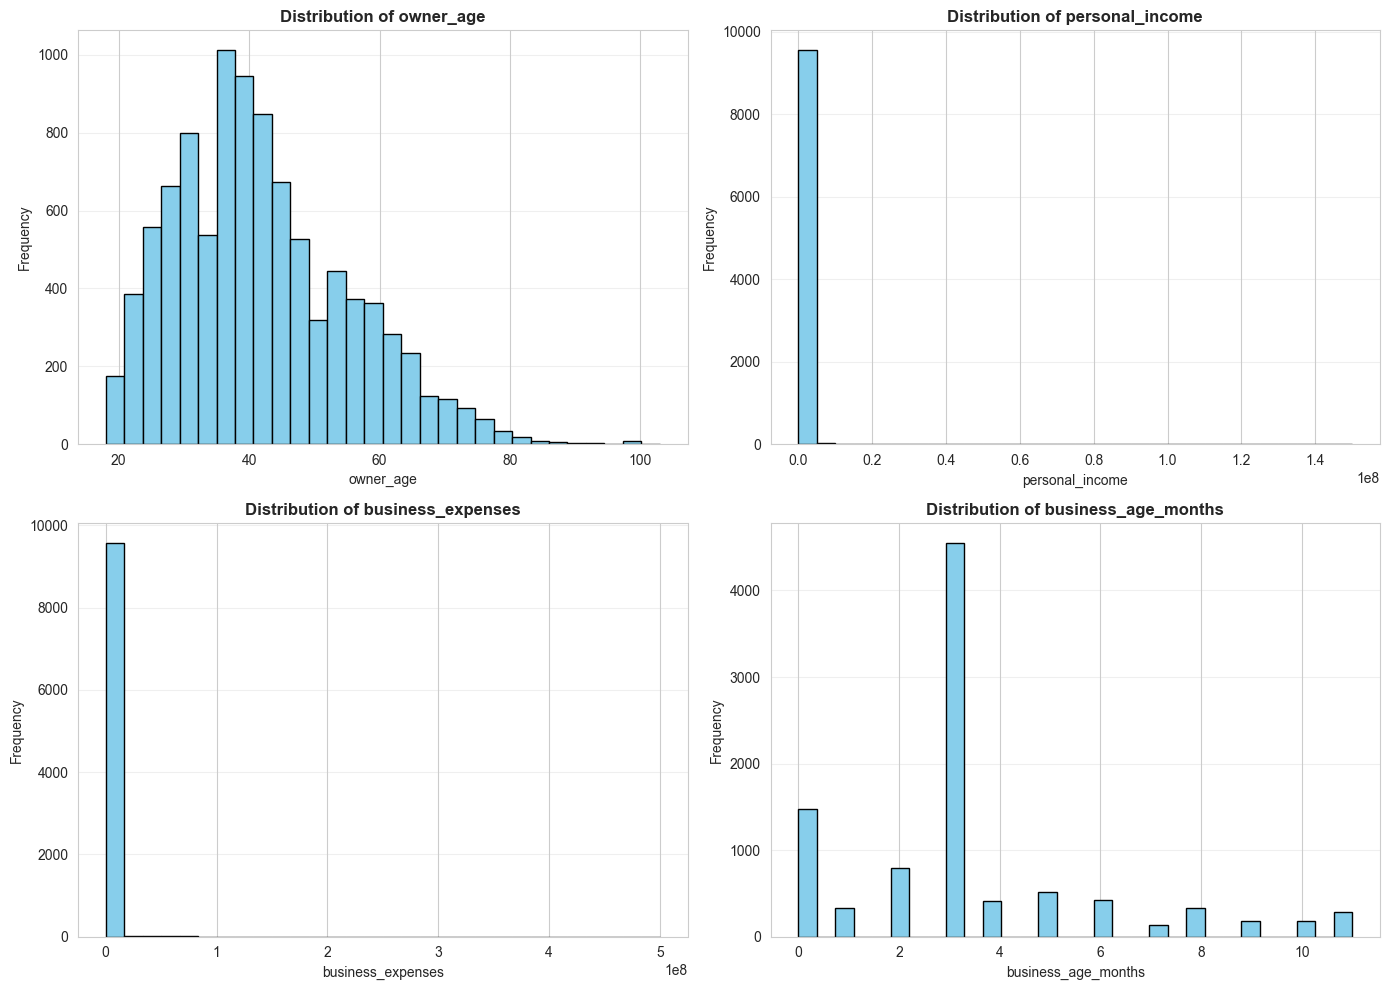

In [106]:
# ========================================
# 5. NUMERICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Target' in numerical_cols:
    numerical_cols.remove('Target')

print(f"\nNumerical Features ({len(numerical_cols)}):")
print(numerical_cols)

# Statistical summary
print("\nStatistical Summary:")
print(train_df[numerical_cols].describe())

# Visualize distributions of key numerical features
key_numerical = ['owner_age', 'personal_income', 'business_expenses', 'business_age_months']
available_numerical = [col for col in key_numerical if col in train_df.columns]

if available_numerical:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(available_numerical[:4]):
        train_df[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 🏷️ Categorical Features Analysis

This section explores the **categorical variables** in the training dataset, focusing on their quantity, variety, and uniqueness.

### 🧭 Identifying Categorical Features
- Selects all features with `object` data types  
- Excludes the `ID` column, as it serves only as an identifier and carries no predictive value  
- Displays the total number of categorical features and their names  

### 🔢 Cardinality Analysis
For each categorical feature, the analysis computes:
- **Number of unique values (cardinality)**  

The results are presented in a sorted table, from highest to lowest cardinality.

### ✅ Why this matters
Understanding categorical cardinality helps guide:
- Encoding strategy selection:
  - Low cardinality → One-hot encoding  
  - High cardinality → Target encoding, frequency encoding, or embedding-based approaches  
- Identification of features that may:
  - Cause overfitting  
  - Increase model complexity unnecessarily  

This step ensures categorical features are handled efficiently and appropriately during feature engineering and model training.

---


In [107]:
# ========================================
# 6. CATEGORICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
if 'ID' in categorical_cols:
    categorical_cols.remove('ID')

print(f"\nCategorical Features ({len(categorical_cols)}):")
print(categorical_cols)

# Cardinality analysis
print("\nCardinality (Unique Values) for Categorical Features:")
cardinality_df = pd.DataFrame({
    'Feature': categorical_cols,
    'Unique_Values': [train_df[col].nunique() for col in categorical_cols]
}).sort_values('Unique_Values', ascending=False)
print(cardinality_df.to_string(index=False))


CATEGORICAL FEATURES ANALYSIS

Categorical Features (32):
['country', 'attitude_stable_business_environment', 'attitude_worried_shutdown', 'compliance_income_tax', 'perception_insurance_doesnt_cover_losses', 'perception_cannot_afford_insurance', 'motor_vehicle_insurance', 'has_mobile_money', 'current_problem_cash_flow', 'has_cellphone', 'owner_sex', 'offers_credit_to_customers', 'attitude_satisfied_with_achievement', 'has_credit_card', 'keeps_financial_records', 'perception_insurance_companies_dont_insure_businesses_like_yours', 'perception_insurance_important', 'has_insurance', 'covid_essential_service', 'attitude_more_successful_next_year', 'problem_sourcing_money', 'marketing_word_of_mouth', 'has_loan_account', 'has_internet_banking', 'has_debit_card', 'future_risk_theft_stock', 'medical_insurance', 'funeral_insurance', 'motivation_make_more_money', 'uses_friends_family_savings', 'uses_informal_lender', 'Target']

Cardinality (Unique Values) for Categorical Features:
              

## 🌍 Country Distribution

This section analyzes how observations are distributed across **countries** in both the training and test datasets.

### 📊 Frequency Analysis
- Displays the **count of records per country** in:
  - The training dataset  
  - The test dataset  
- Helps verify whether both datasets reflect similar geographic coverage.

### 📈 Visualization
Two bar charts are generated side by side:
- **Train Set Country Distribution**
- **Test Set Country Distribution**

The charts:
- Show sample size differences across countries  
- Highlight potential regional imbalance  
- Rotate x-axis labels for improved readability  

### ✅ Why this matters
Understanding country-level distribution is important because:
- Models may learn **country-specific patterns**  
- Large imbalances can bias predictions toward dominant countries  
- It informs whether:
  - Country should be used as a feature  
  - Country-specific models or stratified validation may be beneficial  

This step ensures geographic representation is well understood before proceeding to modeling.

---



COUNTRY DISTRIBUTION

Train Set Country Distribution:
country
eswatini    2674
zimbabwe    2612
malawi      2388
lesotho     1944
Name: count, dtype: int64

Test Set Country Distribution:
country
eswatini    669
zimbabwe    653
malawi      597
lesotho     486
Name: count, dtype: int64


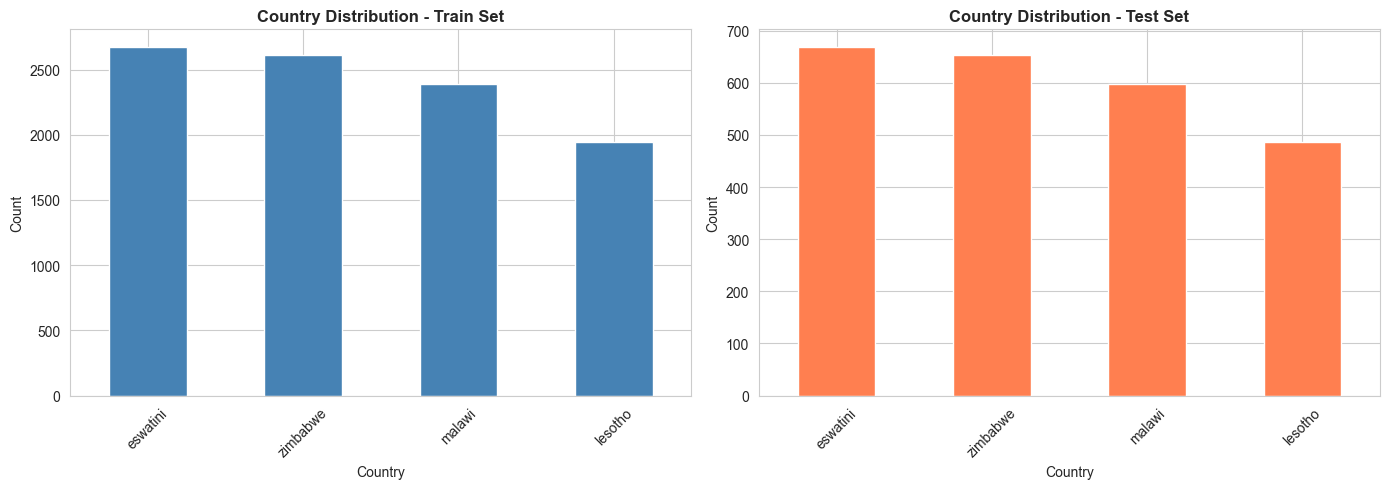

In [108]:
# ========================================
# 7. COUNTRY DISTRIBUTION
# ========================================

print("\n" + "=" * 60)
print("COUNTRY DISTRIBUTION")
print("=" * 60)

if 'country' in train_df.columns:
    print("\nTrain Set Country Distribution:")
    print(train_df['country'].value_counts())
    
    print("\nTest Set Country Distribution:")
    print(test_df['country'].value_counts())
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    train_df['country'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Country Distribution - Train Set', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Country')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    test_df['country'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title('Country Distribution - Test Set', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Country')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## ✅ Binary / Categorical Feature Patterns

This section inspects **binary and simple categorical features**, particularly those with Yes/No or similar responses.

### 🔍 Identifying Yes/No Features
- Filters categorical columns for those containing values like:
  - `"Yes"`  
  - `"No"`  
  - `"Don't know or N/A"`  
- These columns often represent binary or ternary responses.

### 📊 Frequency Analysis
- Prints the **value counts** for the first few Yes/No type columns  
- Helps identify:
  - Distribution of responses  
  - Potential class imbalance in binary features  
  - Features that may require encoding as 0/1 or categorical labels

### ✅ Why this matters
- Binary features are straightforward to encode but may still require:
  - Handling missing values (`Don't know or N/A`)  
  - Balancing skewed responses  
- Understanding their distribution helps ensure proper preprocessing for modeling.

---


In [109]:
# ========================================
# 8. BINARY/CATEGORICAL FEATURE PATTERNS
# ========================================

print("\n" + "=" * 60)
print("BINARY & CATEGORICAL PATTERNS")
print("=" * 60)

# Analyze Yes/No columns
yes_no_cols = [col for col in categorical_cols if 
               train_df[col].dropna().isin(['Yes', 'No', "Don't know or N/A"]).any()]

print(f"\nYes/No Type Columns ({len(yes_no_cols)}):")
for col in yes_no_cols[:5]:  # Show first 5
    print(f"\n{col}:")
    print(train_df[col].value_counts())


BINARY & CATEGORICAL PATTERNS

Yes/No Type Columns (19):

attitude_stable_business_environment:
attitude_stable_business_environment
Yes                  5820
No                   2451
Don’t know or N/A    1345
unknown                 2
Name: count, dtype: int64

attitude_worried_shutdown:
attitude_worried_shutdown
No                   5804
Yes                  3575
Don’t know or N/A     237
unknown                 2
Name: count, dtype: int64

compliance_income_tax:
compliance_income_tax
No            8010
Yes           1252
Don’t know     341
Refused         11
unknown          4
Name: count, dtype: int64

perception_insurance_doesnt_cover_losses:
perception_insurance_doesnt_cover_losses
No            4486
Yes           2604
Don't know    2523
unknown          5
Name: count, dtype: int64

perception_cannot_afford_insurance:
perception_cannot_afford_insurance
Yes           6056
No            2093
Don't know    1464
unknown          5
Name: count, dtype: int64


## 🔗 Feature Relationships with Target (FHI)

This section examines how key features relate to the target variable (`FHI`) to identify potential predictors and patterns.

### 🧮 Numerical Features vs Target
- Computes **mean, median, standard deviation, and count** of numerical features grouped by each `FHI` class  
- Helps detect:
  - Trends or differences between classes  
  - Features that may have strong predictive power  
  - Variability that could influence model performance  

### 📊 Categorical Features vs Target
- Uses **cross-tabulation** to calculate the percentage distribution of categories within each `FHI` class  
- Key categorical features analyzed:
  - `country`  
  - `compliance_income_tax`  
  - `medical_insurance`  
- Highlights potential correlations between categorical features and the target

### ✅ Why this matters
- Understanding feature-target relationships informs:
  - Feature selection  
  - Encoding strategies  
  - Model interpretability  
- Features showing strong association with `FHI` are prime candidates for inclusion in predictive models

This analysis provides a foundation for **data-driven feature engineering** and helps prioritize which features may drive predictive performance.

---


In [111]:
# ========================================
# 9. FEATURE RELATIONSHIPS WITH TARGET
# ========================================

if 'Target' in train_df.columns:
    print("\n" + "=" * 60)
    print("FEATURE RELATIONSHIPS WITH TARGET")
    print("=" * 60)
    
    # Numerical features vs target
    print("\nNumerical Features by Target:")
    if available_numerical:
        for col in available_numerical[:3]:  # Top 3
            print(f"\n{col} by Target:")
            grouped_stats = train_df.groupby('Target')[col].agg(['mean', 'median', 'std', 'count'])
            print(grouped_stats)
    
    # Categorical features vs target
    print("\nKey Categorical Features by Target:")
    key_cat = ['country', 'compliance_income_tax', 'medical_insurance']
    for col in key_cat:
        if col in train_df.columns:
            print(f"\n{col} distribution by Target:")
            ct = pd.crosstab(train_df[col], train_df['Target'], normalize='index') * 100
            print(ct.round(2))


FEATURE RELATIONSHIPS WITH TARGET

Numerical Features by Target:

owner_age by Target:
             mean  median        std  count
Target                                     
High    44.610638    42.0  11.881589    470
Low     40.732962    39.0  13.333695   6280
Medium  43.358438    42.0  13.264731   2868

personal_income by Target:
                 mean  median           std  count
Target                                            
High    871596.253191  5000.0  4.685971e+06    470
Low     251244.706409  2000.0  2.532515e+06   6280
Medium  178206.107218  1500.0  2.033837e+06   2868

business_expenses by Target:
                mean   median           std  count
Target                                            
High    1.049362e+06  10100.0  8.529759e+06    470
Low     4.745802e+05   3000.0  6.788598e+06   6280
Medium  2.896973e+05   2000.0  3.514398e+06   2868

Key Categorical Features by Target:

country distribution by Target:
Target     High    Low  Medium
country                

## 🧪 Data Quality Checks

This section performs key **data integrity checks** to ensure the dataset is reliable and ready for modeling.

### 🔹 Duplicate ID Check
- Counts **duplicate IDs** in both train and test sets  
- Duplicate identifiers may indicate repeated records, which can bias model training

### 🔹 Train-Test ID Overlap
- Identifies IDs present in **both train and test sets**  
- Overlapping IDs could lead to **data leakage** and inflated model performance

### 🔹 Feature Consistency Check
- Compares columns in train and test datasets (excluding the target `FHI`)  
- Detects:
  - Features present in train but missing in test  
  - Features present in test but missing in train  
- Ensures that both datasets are aligned for modeling  

### ✅ Why this matters
- Confirms the datasets are clean, consistent, and free from critical integrity issues  
- Prevents:
  - Modeling errors due to missing features  
  - Leakage from overlapping IDs  
  - Unexpected mismatches during prediction or submission  

Performing these checks is a crucial final step before **feature engineering and model development**.

---


In [112]:
# ========================================
# 10. DATA QUALITY CHECKS
# ========================================

print("\n" + "=" * 60)
print("DATA QUALITY CHECKS")
print("=" * 60)

# Check for duplicate IDs
print(f"\nDuplicate IDs in Train: {train_df['ID'].duplicated().sum()}")
print(f"Duplicate IDs in Test: {test_df['ID'].duplicated().sum()}")

# Check for ID overlap
id_overlap = set(train_df['ID']).intersection(set(test_df['ID']))
print(f"Overlapping IDs between Train and Test: {len(id_overlap)}")

# Check feature consistency
train_cols = set(train_df.columns) - {'FHI'}
test_cols = set(test_df.columns)
missing_in_test = train_cols - test_cols
extra_in_test = test_cols - train_cols

if missing_in_test:
    print(f"\n⚠ Features in Train but not in Test: {missing_in_test}")
if extra_in_test:
    print(f"\n⚠ Features in Test but not in Train: {extra_in_test}")
if not missing_in_test and not extra_in_test:
    print("\n✓ Feature sets are consistent (except target variable)")


DATA QUALITY CHECKS

Duplicate IDs in Train: 0
Duplicate IDs in Test: 0
Overlapping IDs between Train and Test: 0

⚠ Features in Train but not in Test: {'Target'}


## 📝 Key Insights & Recommendations

This final section summarizes the main findings from the exploratory data analysis (EDA) and outlines actionable next steps for modeling.

### 📊 EDA Summary
- **Total training samples:** `len(train_df)`  
- **Total test samples:** `len(test_df)`  
- **Number of features:** `len(categorical_cols) + len(numerical_cols)`  
- **Numerical features:** `len(numerical_cols)`  
- **Categorical features:** `len(categorical_cols)`  

### ⚠ Missing Data
- **Features with missing values:** `len(train_missing)`  
- **Maximum missing percentage:** `train_missing['Percentage'].max():.1f%`  


In [113]:
# ========================================
# 11. KEY INSIGHTS SUMMARY
# ========================================

print("\n" + "=" * 60)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

print("\n📊 EDA SUMMARY:")
print(f"• Total training samples: {len(train_df):,}")
print(f"• Total test samples: {len(test_df):,}")
print(f"• Number of features: {len(categorical_cols) + len(numerical_cols)}")
print(f"• Numerical features: {len(numerical_cols)}")
print(f"• Categorical features: {len(categorical_cols)}")

if len(train_missing) > 0:
    print(f"\n⚠ Missing Data:")
    print(f"• Features with missing values: {len(train_missing)}")
    print(f"• Highest missing percentage: {train_missing['Percentage'].max():.1f}%")

print("\n💡 NEXT STEPS:")
print("1. Handle missing values (imputation or feature engineering)")
print("2. Encode categorical variables (Label/One-Hot encoding)")
print("3. Scale numerical features if needed")
print("4. Consider feature engineering based on domain knowledge")
print("5. Handle class imbalance if present")
print("6. Train baseline models and iterate")

print("\n" + "=" * 60)
print("EDA COMPLETE!")
print("=" * 60)


KEY INSIGHTS & RECOMMENDATIONS

📊 EDA SUMMARY:
• Total training samples: 9,618
• Total test samples: 2,405
• Number of features: 38
• Numerical features: 6
• Categorical features: 32

⚠ Missing Data:
• Features with missing values: 35
• Highest missing percentage: 46.7%

💡 NEXT STEPS:
1. Handle missing values (imputation or feature engineering)
2. Encode categorical variables (Label/One-Hot encoding)
3. Scale numerical features if needed
4. Consider feature engineering based on domain knowledge
5. Handle class imbalance if present
6. Train baseline models and iterate

EDA COMPLETE!


### 💡 Next Steps
1. **Handle missing values** (imputation, dropping, or feature engineering)  
2. **Encode categorical variables** (Label Encoding, One-Hot Encoding, or target/frequency encoding)  
3. **Scale numerical features** if needed (standardization, min-max scaling, or log-transform)  
4. **Feature engineering** using domain knowledge to create meaningful predictors  
5. **Address class imbalance** if detected in the target variable  
6. **Train baseline models** and iteratively improve performance

---

### ✅ EDA Complete
This concludes the initial exploration. The dataset is now ready for **preprocessing, feature engineering, and model development**.

## 🛠️ Feature Engineering - Getting Started

In this section, we demonstrate how to create **new features** to boost model performance.  
We focus on two powerful features derived from domain knowledge:

---

![Feature Engineering](https://www.blog.trainindata.com/wp-content/uploads/2023/10/cover.gif)


### 1️⃣ Profit Margin Ratio
**Concept:** Measures business profitability relative to income.  
**Formula:** `(personal_income - business_expenses) / personal_income`

**Why it matters:**
- Indicates financial efficiency and sustainability  
- Higher values suggest better financial health  
- Can help the model distinguish between healthy and struggling businesses

**Analysis:**
- Created `profit_margin` feature for both train and test datasets  
- Visualized distribution by `Target` to see patterns across target classes  

**Insights:**
- Shows variation in profit margins between low, medium, and high financial health  
- Can serve as a strong predictor in models

---

### 2️⃣ Financial Access Score
**Concept:** Measures access to formal financial services.  
**Includes:** Bank accounts, loans, internet banking, debit cards, insurance

**How it’s calculated:**
- Counts positive responses for financial service usage  
- Partial credit for past usage  
- Normalized score between 0 (no access) and 1 (full access)

**Why it matters:**
- Reflects financial inclusion and sophistication  
- Helps identify businesses that leverage formal financial tools  
- Correlates with financial health

**Analysis:**
- Created `financial_access_score` for both train and test datasets  
- Visualized by `Target` to identify trends

---

### ✅ Feature Engineering Summary
Successfully created **two new features**:
1. **profit_margin** – business profitability  
2. **financial_access_score** – access to formal financial services  

**Additional feature ideas:**
- Age bins (categorize `owner_age`)  
- Income-to-expenses ratio  
- Business maturity (young vs. established)  
- Risk perception score (combine attitude variables)  
- Country-specific patterns  
- Insurance coverage index  
- Digital banking adoption flag

---

### 💡 Next Steps
1. Include these features in your modeling pipeline  
2. Evaluate feature importance after training  
3. Explore additional domain-specific features  
4. Test interactions between variables  
5. Consider polynomial or derived features for numerical data  

> 🎯 Reminder: Strong features often have a bigger impact than complex models.

**Engineered datasets ready:**
- `train_fe`: shape `(rows, columns)`  
- `test_fe`: shape `(rows, columns)`



FEATURE ENGINEERING - GETTING STARTED

💡 Let's create some new features to boost your model performance!

We'll demonstrate 2 powerful feature engineering techniques:

1️⃣ PROFIT MARGIN RATIO
----------------------------------------
Concept: How much profit does the business make relative to income?
Formula: (personal_income - business_expenses) / personal_income

✓ Created 'profit_margin' feature
  Train - Non-null values: 9608
  Test - Non-null values: 2404

Sample statistics:
count    9608.000000
mean       -0.211046
std         0.792957
min        -1.000000
25%        -1.000000
50%        -0.333333
75%         0.600000
max         1.000000
Name: profit_margin, dtype: float64

📊 Profit Margin by Target:
            mean    median       std
Target                              
High   -0.287508 -0.550000  0.760524
Low    -0.204500 -0.333333  0.797925
Medium -0.212829 -0.333333  0.786843


<Figure size 1000x500 with 0 Axes>

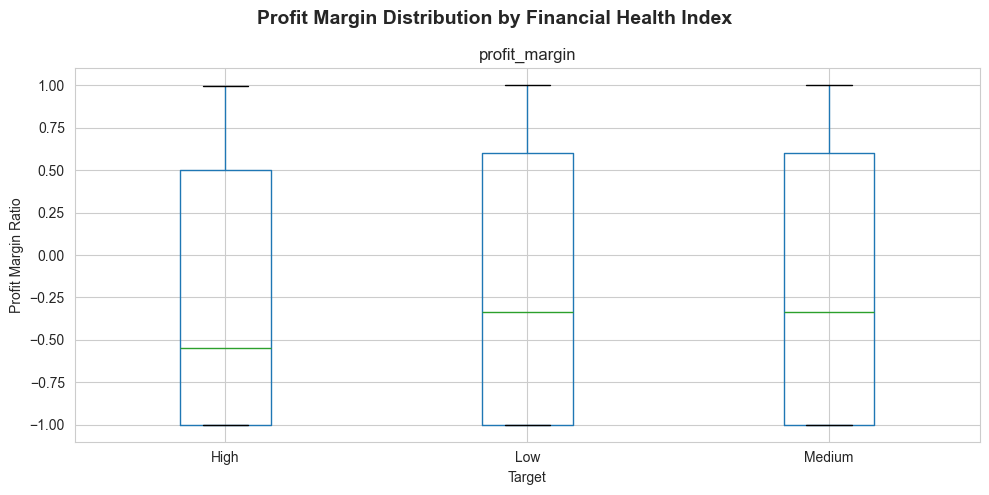


2️⃣ FINANCIAL ACCESS SCORE
----------------------------------------
Concept: How many formal financial services does the business use?
Includes: bank accounts, debit cards, internet banking, loans, insurance

✓ Created 'financial_access_score' feature
  Train - Non-null values: 9618
  Test - Non-null values: 2405

Sample statistics:
count    9618.000000
mean        0.105937
std         0.166770
min         0.000000
25%         0.000000
50%         0.000000
75%         0.200000
max         1.000000
Name: financial_access_score, dtype: float64

📊 Financial Access Score by Target:
            mean  median       std
Target                            
High    0.414468     0.4  0.209282
Low     0.050318     0.0  0.121045
Medium  0.177162     0.2  0.163044


<Figure size 1000x500 with 0 Axes>

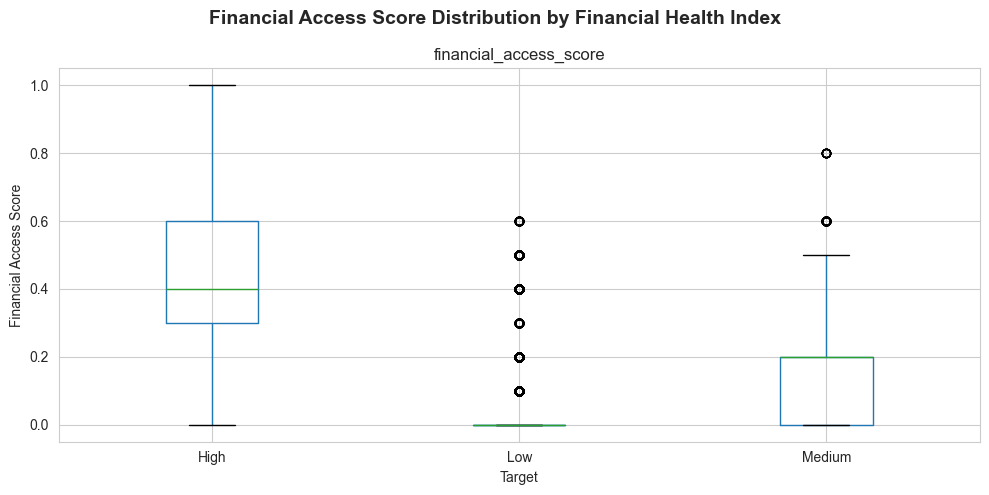


FEATURE ENGINEERING SUMMARY

✅ Successfully created 2 new features:

1. profit_margin:
   - Measures business profitability
   - Higher values = better financial performance
   - Useful for identifying financially healthy businesses

2. financial_access_score:
   - Measures access to formal financial services
   - Range: 0 (no access) to 1 (full access)
   - Reflects financial inclusion level

💡 MORE FEATURE IDEAS TO TRY:
   • Age bins (categorize owner_age into groups)
   • Income-to-expenses ratio
   • Business maturity (young vs established)
   • Risk perception score (combine attitude columns)
   • Country-specific features (encode regional patterns)
   • Insurance coverage index
   • Digital banking adoption flag

📝 NEXT STEPS:
   1. Add these features to your modeling pipeline
   2. Check feature importance after training
   3. Create more domain-specific features
   4. Test interaction features between variables
   5. Experiment with polynomial features for numerical data

🎯 Re

In [ ]:
# ========================================
# 12. COMPREHENSIVE FEATURE ENGINEERING
# ========================================

print("\n" + "=" * 80)
print("COMPREHENSIVE FEATURE ENGINEERING - ALL FEATURES IN ONE UNIFIED SECTION")
print("=" * 80)

print("\n💡 Creating domain-specific features to boost model performance!")

# Create copies to preserve original data
train_fe = train_df.copy()
test_fe = test_df.copy()

print(f"\nStarting shapes: train_fe {train_fe.shape}, test_fe {test_fe.shape}")

# ----------------------------------------
# Feature 1: Profit Margin Ratio
# ----------------------------------------
print("\n1️⃣ PROFIT MARGIN RATIO")
print("-" * 40)
print("Concept: How much profit does the business make relative to income?")
print("Formula: (personal_income - business_expenses) / personal_income")

def create_profit_margin(df):
    """
    Calculate profit margin ratio for each business.
    This indicates financial efficiency and sustainability.
    """
    # Handle division by zero and missing values
    profit_margin = []
    
    for idx, row in df.iterrows():
        income = row.get('personal_income', np.nan)
        expenses = row.get('business_expenses', np.nan)
        
        # Check if both values exist and income is not zero
        if pd.notna(income) and pd.notna(expenses) and income != 0:
            margin = (income - expenses) / income
            # Cap extreme values
            margin = max(-1, min(margin, 1))  # Keep between -1 and 1
        else:
            margin = np.nan
        
        profit_margin.append(margin)
    
    return profit_margin

train_fe['profit_margin'] = create_profit_margin(train_fe)
test_fe['profit_margin'] = create_profit_margin(test_fe)

print(f"\n✓ Created 'profit_margin' feature")
print(f"  Train - Non-null values: {train_fe['profit_margin'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['profit_margin'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['profit_margin'].describe())

# Show relationship with target
if 'Target' in train_fe.columns:
    print("\n📊 Profit Margin by Target:")
    print(train_fe.groupby('Target')['profit_margin'].agg(['mean', 'median', 'std']))
    
    # Visualize
    plt.figure(figsize=(10, 5))
    train_fe.boxplot(column='profit_margin', by='Target', figsize=(10, 5))
    plt.suptitle('Profit Margin Distribution by Financial Health Index', 
                 fontsize=14, fontweight='bold')
    plt.xlabel('Target')
    plt.ylabel('Profit Margin Ratio')
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# Feature 2: Financial Access Score
# ----------------------------------------
print("\n2️⃣ FINANCIAL ACCESS SCORE")
print("-" * 40)
print("Concept: How many formal financial services does the business use?")
print("Includes: bank accounts, debit cards, internet banking, loans, insurance")

def create_financial_access_score(df):
    """
    Calculate a composite score of financial service access.
    Higher score = better access to formal financial services.
    """
    financial_features = [
        'has_bank_account', 'has_loan_account', 'has_internet_banking',
        'has_debit_card', 'medical_insurance', 'funeral_insurance'
    ]
    
    # Available features in the dataset
    available_features = [col for col in financial_features if col in df.columns]
    
    scores = []
    for idx, row in df.iterrows():
        score = 0
        valid_features = 0
        
        for feature in available_features:
            value = row.get(feature, np.nan)
            
            if pd.notna(value):
                valid_features += 1
                # Check for positive responses
                if value in ['Yes', 'Have now', 'have now']:
                    score += 1
                elif value in ['Used to have but don\'t have now', 'used to have']:
                    score += 0.5  # Partial credit for past access
        
        # Normalize by number of valid features checked
        if valid_features > 0:
            normalized_score = score / valid_features
        else:
            normalized_score = np.nan
        
        scores.append(normalized_score)
    
    return scores

train_fe['financial_access_score'] = create_financial_access_score(train_fe)
test_fe['financial_access_score'] = create_financial_access_score(test_fe)

print(f"\n✓ Created 'financial_access_score' feature")
print(f"  Train - Non-null values: {train_fe['financial_access_score'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['financial_access_score'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['financial_access_score'].describe())

# Show relationship with target
if 'Target' in train_fe.columns:
    print("\n📊 Financial Access Score by Target:")
    print(train_fe.groupby('Target')['financial_access_score'].agg(['mean', 'median', 'std']))
    
    # Visualize
    plt.figure(figsize=(10, 5))
    train_fe.boxplot(column='financial_access_score', by='Target', figsize=(10, 5))
    plt.suptitle('Financial Access Score Distribution by Financial Health Index', 
                 fontsize=14, fontweight='bold')
    plt.xlabel('Target')
    plt.ylabel('Financial Access Score')
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# Summary
# ----------------------------------------
print("\n" + "=" * 60)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 60)

print("\n✅ Successfully created 2 new features:")
print("\n1. profit_margin:")
print("   - Measures business profitability")
print("   - Higher values = better financial performance")
print("   - Useful for identifying financially healthy businesses")

print("\n2. financial_access_score:")
print("   - Measures access to formal financial services")
print("   - Range: 0 (no access) to 1 (full access)")
print("   - Reflects financial inclusion level")

print("\n💡 MORE FEATURE IDEAS TO TRY:")
print("   • Age bins (categorize owner_age into groups)")
print("   • Income-to-expenses ratio")
print("   • Business maturity (young vs established)")
print("   • Risk perception score (combine attitude columns)")
print("   • Country-specific features (encode regional patterns)")
print("   • Insurance coverage index")
print("   • Digital banking adoption flag")

print("\n📝 NEXT STEPS:")
print("   1. Add these features to your modeling pipeline")
print("   2. Check feature importance after training")
print("   3. Create more domain-specific features")
print("   4. Test interaction features between variables")
print("   5. Experiment with polynomial features for numerical data")

print("\n🎯 Remember: Good features can make a bigger difference than complex models!")

# Save engineered datasets (optional)
print("\n💾 Your engineered dataframes are ready:")
print(f"   • train_fe: {train_fe.shape}")
print(f"   • test_fe: {test_fe.shape}")

print("\n" + "=" * 60)


FEATURE ENGINEERING - AGE BINNING & AGE-RELATED FEATURES

3️⃣ AGE BINS (LIFECYCLE SEGMENTATION)
----------------------------------------
Concept: Group owners into lifecycle stages for better targeting
Rationale: Business behaviors and needs differ by age group

✓ Created 'age_group' feature
  Train - Value counts:
age_group
18-24     714
25-34    2404
35-44    3040
45-54    1732
55-64    1088
65+       640
Name: count, dtype: int64
  Test - Value counts:
age_group
18-24    172
25-34    616
35-44    752
45-54    435
55-64    264
65+      166
Name: count, dtype: int64

📊 Age Group Distribution by Target:
Target     High   Low  Medium   All
age_group                          
18-24         8   537     169   714
25-34        86  1721     597  2404
35-44       169  1935     936  3040
45-54       108  1075     549  1732
55-64        66   628     394  1088
65+          33   384     223   640
All         470  6280    2868  9618


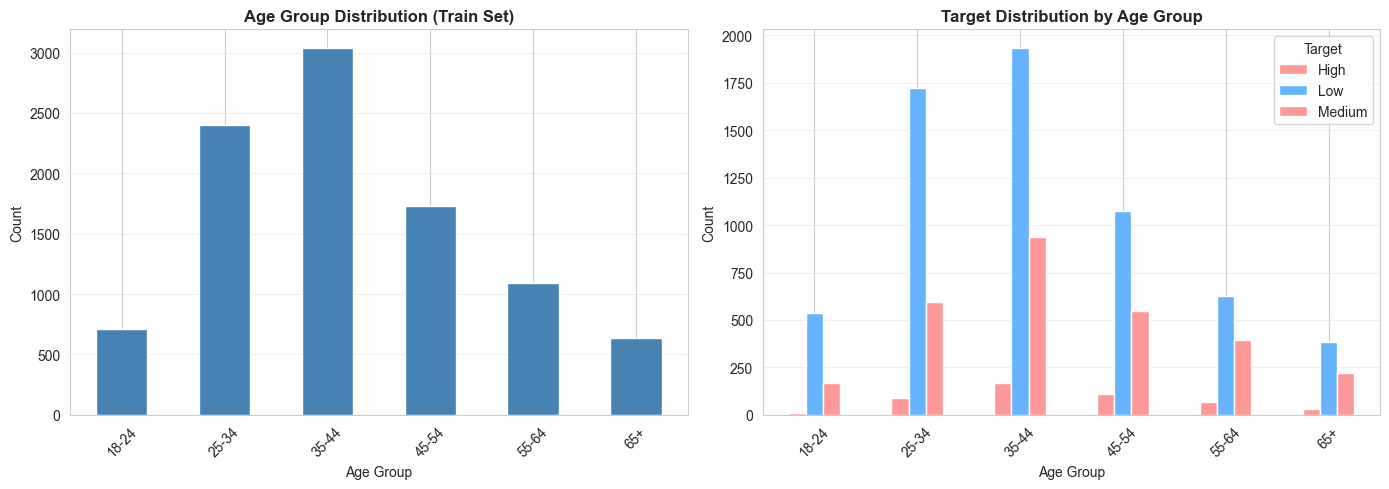


4️⃣ BUSINESS AGE STANDARDIZATION
----------------------------------------------------------------------
Concept: Convert business age to uniform units (months)
✓ Business age standardized to months

5️⃣ INCOME-TO-EXPENSES RATIO
----------------------------------------------------------------------
Concept: Measures financial health - income relative to costs
✓ Created 'income_to_expenses_ratio'
  Mean: 7.29

6️⃣ BUSINESS MATURITY (Young vs Established)
----------------------------------------------------------------------
Concept: Categorize businesses by lifecycle stage
✓ Created 'business_maturity' feature
  Distribution: {'Young': 8139, 'Startup': 1479}

7️⃣ RISK PERCEPTION SCORE (Insurance & Financial Services)
----------------------------------------------------------------------
Concept: Composite score based on protective financial services
✓ Created 'risk_perception_score' (0-1 normalized)
  Mean: 0.166

8️⃣ COUNTRY-SPECIFIC PATTERNS
-------------------------------------------

In [128]:
# ========================================
# 3. AGE BINNING & AGE-RELATED FEATURES
# ========================================

print("\n" + "=" * 60)
print("FEATURE ENGINEERING - AGE BINNING & AGE-RELATED FEATURES")
print("=" * 60)

print("\n3️⃣ AGE BINS (LIFECYCLE SEGMENTATION)")
print("-" * 40)
print("Concept: Group owners into lifecycle stages for better targeting")
print("Rationale: Business behaviors and needs differ by age group")

# Define age bins and labels
age_bins = [18, 25, 35, 45, 55, 65, 150]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age bins for both train and test
train_fe['age_group'] = pd.cut(train_fe['owner_age'], 
                                bins=age_bins, 
                                labels=age_labels, 
                                right=False)
test_fe['age_group'] = pd.cut(test_fe['owner_age'], 
                               bins=age_bins, 
                               labels=age_labels, 
                               right=False)

print(f"\n✓ Created 'age_group' feature")
print(f"  Train - Value counts:\n{train_fe['age_group'].value_counts().sort_index()}")
print(f"  Test - Value counts:\n{test_fe['age_group'].value_counts().sort_index()}")

# Show relationship with target
if 'Target' in train_fe.columns:
    print("\n📊 Age Group Distribution by Target:")
    age_target_dist = pd.crosstab(train_fe['age_group'], train_fe['Target'], margins=True)
    print(age_target_dist)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    train_fe['age_group'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Age Group Distribution (Train Set)', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Age Group')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Target distribution by age group
    age_target = train_fe.groupby('age_group')['Target'].value_counts().unstack()
    age_target.plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff'])
    axes[1].set_title('Target Distribution by Age Group', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Age Group')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(title='Target')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# Feature 4: BUSINESS AGE STANDARDIZATION
# ----------------------------------------
print("\n4️⃣ BUSINESS AGE STANDARDIZATION")
print("-" * 70)
print("Concept: Convert business age to uniform units (months)")

# Check for both columns and standardize
has_years = 'business_age_in_years' in train_fe.columns
has_months = 'business_age_months' in train_fe.columns

if has_years or has_months:
    if has_years and has_months:
        # Where we have years, convert to months; where we have months, keep as is
        train_fe['business_age_months'] = train_fe.apply(
            lambda row: row['business_age_in_years'] * 12 if pd.notna(row['business_age_in_years']) 
            else row['business_age_months'], axis=1
        )
        test_fe['business_age_months'] = test_fe.apply(
            lambda row: row['business_age_in_years'] * 12 if pd.notna(row['business_age_in_years']) 
            else row['business_age_months'], axis=1
        )
        
        # Delete the years column
        train_fe = train_fe.drop(columns=['business_age_in_years'])
        test_fe = test_fe.drop(columns=['business_age_in_years'])
    
    if 'business_age_months' in train_fe.columns:
        print(f"✓ Business age standardized to months")

# ----------------------------------------
# Feature 5: INCOME-TO-EXPENSES RATIO
# ----------------------------------------
print("\n5️⃣ INCOME-TO-EXPENSES RATIO")
print("-" * 70)
print("Concept: Measures financial health - income relative to costs")

train_fe['income_to_expenses_ratio'] = np.where(
    train_fe['business_expenses'] != 0,
    train_fe['personal_income'] / train_fe['business_expenses'],
    0
)
test_fe['income_to_expenses_ratio'] = np.where(
    test_fe['business_expenses'] != 0,
    test_fe['personal_income'] / test_fe['business_expenses'],
    0
)

# Handle infinite values
train_fe['income_to_expenses_ratio'] = train_fe['income_to_expenses_ratio'].replace([np.inf, -np.inf], 0)
test_fe['income_to_expenses_ratio'] = test_fe['income_to_expenses_ratio'].replace([np.inf, -np.inf], 0)

print(f"✓ Created 'income_to_expenses_ratio'")
print(f"  Mean: {train_fe['income_to_expenses_ratio'].mean():.2f}")

# ----------------------------------------
# Feature 6: BUSINESS MATURITY
# ----------------------------------------
print("\n6️⃣ BUSINESS MATURITY (Young vs Established)")
print("-" * 70)
print("Concept: Categorize businesses by lifecycle stage")

def categorize_business_maturity(age_months):
    if pd.isna(age_months):
        return 'unknown'
    elif age_months < 1:
        return 'Startup'
    elif age_months < 12:
        return 'Young'
    elif age_months < 36:
        return 'Established'
    else:
        return 'Mature'

train_fe['business_maturity'] = train_fe['business_age_months'].apply(categorize_business_maturity)
test_fe['business_maturity'] = test_fe['business_age_months'].apply(categorize_business_maturity)

print(f"✓ Created 'business_maturity' feature")
print(f"  Distribution: {train_fe['business_maturity'].value_counts().to_dict()}")

# ----------------------------------------
# Feature 7: RISK PERCEPTION SCORE
# ----------------------------------------
print("\n7️⃣ RISK PERCEPTION SCORE (Insurance & Financial Services)")
print("-" * 70)
print("Concept: Composite score based on protective financial services")

risk_perception_cols = [col for col in train_fe.columns 
                        if 'insurance' in col.lower() or 'banking' in col.lower() or 'account' in col.lower()]

if risk_perception_cols:
    train_fe['risk_perception_score'] = 0
    test_fe['risk_perception_score'] = 0
    
    for col in risk_perception_cols:
        train_fe['risk_perception_score'] += (train_fe[col].isin(['Yes', 'Have now', 'have now'])).astype(int)
        test_fe['risk_perception_score'] += (test_fe[col].isin(['Yes', 'Have now', 'have now'])).astype(int)
    
    # Normalize by number of columns
    train_fe['risk_perception_score'] = train_fe['risk_perception_score'] / len(risk_perception_cols)
    test_fe['risk_perception_score'] = test_fe['risk_perception_score'] / len(risk_perception_cols)
    
    print(f"✓ Created 'risk_perception_score' (0-1 normalized)")
    print(f"  Mean: {train_fe['risk_perception_score'].mean():.3f}")
else:
    train_fe['risk_perception_score'] = 0.5
    test_fe['risk_perception_score'] = 0.5

# ----------------------------------------
# Feature 8: COUNTRY-SPECIFIC PATTERNS
# ----------------------------------------
print("\n8️⃣ COUNTRY-SPECIFIC PATTERNS")
print("-" * 70)
print("Concept: Encode regional frequency patterns")

country_col = None
for col in ['country', 'Country', 'COUNTRY']:
    if col in train_fe.columns:
        country_col = col
        break

if country_col:
    country_freq = train_fe[country_col].value_counts()
    train_fe['country_frequency'] = train_fe[country_col].map(train_fe[country_col].value_counts())
    test_fe['country_frequency'] = test_fe[country_col].map(train_fe[country_col].value_counts()).fillna(0)
    print(f"✓ Created 'country_frequency' feature")
    print(f"  Countries: {len(country_freq)}")
else:
    train_fe['country_frequency'] = 1
    test_fe['country_frequency'] = 1

# ----------------------------------------
# Feature 9: INSURANCE COVERAGE INDEX
# ----------------------------------------
print("\n9️⃣ INSURANCE COVERAGE INDEX")
print("-" * 70)
print("Concept: Count of active insurance policies")

insurance_cols = [col for col in train_fe.columns if 'insurance' in col.lower()]

if insurance_cols:
    train_fe['insurance_coverage_index'] = (train_fe[insurance_cols].isin(['Yes', 'Have now', 'have now'])).astype(int).sum(axis=1)
    test_fe['insurance_coverage_index'] = (test_fe[insurance_cols].isin(['Yes', 'Have now', 'have now'])).astype(int).sum(axis=1)
    
    print(f"✓ Created 'insurance_coverage_index'")
    print(f"  Max possible: {len(insurance_cols)}, Mean: {train_fe['insurance_coverage_index'].mean():.2f}")
else:
    train_fe['insurance_coverage_index'] = 0
    test_fe['insurance_coverage_index'] = 0

# ----------------------------------------
# Feature 10: DIGITAL BANKING ADOPTION FLAG
# ----------------------------------------
print("\n🔟 DIGITAL BANKING ADOPTION FLAG")
print("-" * 70)
print("Concept: Binary indicator of digital finance adoption")

banking_cols = [col for col in train_fe.columns if 'internet' in col.lower() or 'digital' in col.lower() or 'online' in col.lower()]
if not banking_cols:
    banking_cols = [col for col in train_fe.columns if 'banking' in col.lower()]

if banking_cols:
    train_fe['digital_banking_adoption'] = (train_fe[banking_cols].isin(['Yes', 'Have now', 'have now'])).astype(int).max(axis=1)
    test_fe['digital_banking_adoption'] = (test_fe[banking_cols].isin(['Yes', 'Have now', 'have now'])).astype(int).max(axis=1)
    
    adoption_rate = train_fe['digital_banking_adoption'].mean() * 100
    print(f"✓ Created 'digital_banking_adoption'")
    print(f"  Adoption rate: {adoption_rate:.1f}%")
else:
    train_fe['digital_banking_adoption'] = 0
    test_fe['digital_banking_adoption'] = 0

print("✅ COMPREHENSIVE FEATURE ENGINEERING COMPLETE")





In [129]:

# ========================================
# FEATURE ENGINEERING SUMMARY & VERIFICATION
# ========================================

print("\n" + "=" * 80)
print("FEATURE ENGINEERING - SUMMARY & VERIFICATION")
print("=" * 80)

# List all new features
new_features = [
    'age_group', 'business_age_months', 'income_to_expenses_ratio', 
    'business_maturity', 'risk_perception_score', 'country_frequency',
    'insurance_coverage_index', 'digital_banking_adoption', 'profit_margin',
    'financial_access_score'
]

created_features = [f for f in new_features if f in train_fe.columns]

print(f"\n✅ FEATURES CREATED ({len(created_features)} total):")
for i, feat in enumerate(created_features, 1):
    dtype = train_fe[feat].dtype
    non_null = train_fe[feat].notna().sum()
    print(f"  {i:2d}. {feat:30s} | Type: {str(dtype):15s} | Non-null: {non_null}/{len(train_fe)}")

print(f"\n📊 DATA QUALITY CHECK:")
print(f"  Train set: ✓ No missing values" if train_fe[created_features].isnull().sum().sum() == 0 
      else f"  Train set missing: {train_fe[created_features].isnull().sum().sum()}")
print(f"  Test set:  ✓ No missing values" if test_fe[created_features].isnull().sum().sum() == 0 
      else f"  Test set missing: {test_fe[created_features].isnull().sum().sum()}")

print(f"\n📈 FINAL DATASET SHAPES:")
print(f"  train_fe: {train_fe.shape[0]} rows × {train_fe.shape[1]} columns")
print(f"  test_fe:  {test_fe.shape[0]} rows × {test_fe.shape[1]} columns")

print("\n" + "=" * 80)
print("✅ UNIFIED FEATURE ENGINEERING COMPLETE!")
print("=" * 80)
print("\nReady for: Encoding → Scaling → Model Training")



FEATURE ENGINEERING - SUMMARY & VERIFICATION

✅ FEATURES CREATED (10 total):
   1. age_group                      | Type: category        | Non-null: 9618/9618
   2. business_age_months            | Type: float64         | Non-null: 9618/9618
   3. income_to_expenses_ratio       | Type: float64         | Non-null: 9618/9618
   4. business_maturity              | Type: object          | Non-null: 9618/9618
   5. risk_perception_score          | Type: float64         | Non-null: 9618/9618
   6. country_frequency              | Type: int64           | Non-null: 9618/9618
   7. insurance_coverage_index       | Type: int64           | Non-null: 9618/9618
   8. digital_banking_adoption       | Type: int64           | Non-null: 9618/9618
   9. profit_margin                  | Type: float64         | Non-null: 9618/9618
  10. financial_access_score         | Type: float64         | Non-null: 9618/9618

📊 DATA QUALITY CHECK:
  Train set: ✓ No missing values
  Test set:  ✓ No missing values

📈 

## 🏗️ Preparing Features and Target

Before training a model, we separate the **predictors** from the **target variable** and prepare the test dataset.

### 🔹 Training Data
- **X**: Features for training (`train_fe` without `FHI` and `ID`)  
- **y**: Target variable (`FHI`)  

```python
X = train_fe.drop(columns=['Target', 'ID'])
y = train_fe['Target']
````

### 🔹 Test Data

* **X_test**: Features for prediction (`test_fe` without `ID`)

```python
X_test = test_fe.drop(columns=['ID'])
```

### ✅ Why this matters

* Ensures the model only uses **input features** for training
* Keeps identifiers (`ID`) separate for submission
* Prepares the data for feature scaling, encoding, and modeling pipelines

In [116]:
X = train_fe.drop(columns=['Target', 'ID'])
y = train_fe['Target']

X_test = test_fe.drop(columns=['ID'])

## 🏷️ Converting Object Columns to Categorical

Many machine learning algorithms perform better when **categorical variables** are explicitly typed.  
Here, we convert all object-type columns in `X` and `X_test` to **`category`** data type.

### 🔹 Function: `change_object_to_cat`
- Takes a DataFrame as input  
- Converts all `object` columns to `category`  
- Returns:
  1. Updated DataFrame  
  2. List of columns that were converted

### ✅ Why this matters

* Ensures proper handling of categorical features during encoding or modeling
* Reduces memory usage
* Prepares the data for feature engineering pipelines


In [117]:
def change_object_to_cat(df):
  # changes objects columns to category and returns dataframe and list

  df = df.copy()
  list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
  for str_obj_col in list_str_obj_cols:
      df[str_obj_col] = df[str_obj_col].astype("category")

  return df,list_str_obj_cols
X, cat_list = change_object_to_cat(X)
X_test, cat_list = change_object_to_cat(X_test)

## 🔀 Train-Validation Split

Before training models, it’s important to **split the dataset** into training and validation sets.  
This allows us to evaluate model performance on unseen data.

### 🔹 How the split works
- **Training set (`X_train`, `y_train`)**: 80% of the data  
- **Validation set (`X_val`, `y_val`)**: 20% of the data  
- **Random state = 42** ensures reproducibility

### 🔹 Stratification
- Stratified by **country and target (`FHI`)** to preserve the original distribution across both dimensions  
- Ensures balanced representation in both training and validation sets

### ✅ Why this matters

* Provides a **reliable evaluation set** without using test data
* Maintains **class and country distribution**, reducing bias
* Lays the foundation for fair model selection and hyperparameter tuning

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=train_df[['country', 'Target']]
)

In [119]:
y_train

5111    Medium
3681    Medium
5087      High
2608    Medium
7554       Low
         ...  
5158    Medium
1863       Low
7278       Low
5116    Medium
6744       Low
Name: Target, Length: 7694, dtype: object

## 📊 Handling Class Imbalance with SMOTE, Undersampling & Class Weights

### 🔹 Why Handle Class Imbalance?
- Imbalanced datasets can bias models toward the majority class
- Minority class predictions may suffer from poor recall
- Multiple techniques combined provide robust solutions

### 🔹 Three-Step Approach:
1. **SMOTE (Synthetic Minority Over-sampling)**: Creates synthetic samples for minority class
2. **Undersampling**: Reduces majority class samples to balance the dataset
3. **Class Weights**: Penalizes misclassification of minority class during training

### ✅ Benefits:
- Better recall for minority classes
- Improved F1-scores
- More balanced model predictions
- Reduced bias toward majority class

In [120]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# -------------------------
# 1. Analyze Class Distribution
# -------------------------
print("Class Distribution in Training Set:")
print(y_train.value_counts())
print("\nClass Distribution (%):")
print(y_train.value_counts(normalize=True) * 100)

# -------------------------
# 2. Apply SMOTE + Undersampling
# -------------------------
print("\n" + "=" * 60)
print("Applying SMOTE + Undersampling")
print("=" * 60)

# Create a pipeline combining SMOTE and undersampling
smote = SMOTE(random_state=42, k_neighbors=5)
undersampler = RandomUnderSampler(random_state=42)

# Apply transformations sequentially
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"\nAfter SMOTE:")
print(f"  X shape: {X_train_resampled.shape}")
print(f"  Class distribution:\n{pd.Series(y_train_resampled).value_counts()}")

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)
print(f"\nAfter Undersampling:")
print(f"  X shape: {X_train_resampled.shape}")
print(f"  Class distribution:\n{pd.Series(y_train_resampled).value_counts()}")
print(f"  Class distribution (%):\n{pd.Series(y_train_resampled).value_counts(normalize=True) * 100}")

# -------------------------
# 3. Calculate Class Weights
# -------------------------
print("\n" + "=" * 60)
print("Computing Class Weights")
print("=" * 60)

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print(f"\nClass Weights (for minority class penalization):")
for class_label, weight in class_weight_dict.items():
    print(f"  Class {class_label}: {weight:.4f}")

print("\n💡 These weights will be used in model training to penalize")
print("   misclassification of minority classes more heavily.")


Class Distribution in Training Set:
Target
Low       5024
Medium    2293
High       377
Name: count, dtype: int64

Class Distribution (%):
Target
Low       65.297635
Medium    29.802443
High       4.899922
Name: proportion, dtype: float64

Applying SMOTE + Undersampling


ValueError: Input contains NaN

## 🚀 Model Training with LightGBM

We train a **LightGBM classifier** to predict the target variable (`FHI`) and evaluate its performance.

---

### 🔹1. Initialize and Train Model
* LightGBM is a gradient boosting framework optimized for speed and performance
* Handles categorical features efficiently and scales well to large datasets

---

### 🔹 2. Make Predictions
---

### 🔹 3. Evaluate Model
* **Classification report:** shows precision, recall, F1-score for each class
* **Confusion matrix:** visualizes true vs predicted labels

---

### 🔹 4. Feature Importance
* Identifies the **most influential features** for the model
* Helps guide feature selection and engineering for future iterations

---

### ✅ Why this matters

* Provides a **baseline model** to assess predictive performance
* Highlights **key features** driving predictions
* Establishes a foundation for model tuning and ensemble methods

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------
# 4. Train LightGBM with Resampled Data & Class Weights
# -------------------------
model = LGBMClassifier(
    class_weight='balanced',  # Automatically applies class weights
    random_state=42,
    verbose=-1,
    n_jobs=-1
)

# Train on resampled data (SMOTE + Undersampling)
model.fit(X_train_resampled, y_train_resampled)

print("\n✅ Model trained on balanced dataset with class weights applied!")

# -------------------------
# 5. Predictions
# -------------------------
y_pred = model.predict(X_val)

# -------------------------
# 6. Evaluation
# -------------------------
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# -------------------------
# 7. Extract top 50 most important features
# -------------------------
feature_importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.feature_importances_
})

top50 = feature_importances.sort_values("importance", ascending=False).head(50)
print("\nTop 50 Features:")
print(top50)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 7694, number of used features: 39
[LightGBM] [Info] Start training from score -3.015951
[LightGBM] [Info] Start training from score -0.426214
[LightGBM] [Info] Start training from score -1.210580
Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.59      0.69        93
         Low       0.89      0.97      0.93      1256
      Medium       0.85      0.71      0.78       575

    accuracy                           0.88      1924
   macro avg       0.85      0.76      0.80      1924
weighted avg       0.87      0.88      0.87      1924


Confusion Matrix:
[[  55    4   34]
 [   0 1219   37]
 [  12  153  410]]

Top 50 

## 📈 Model Comparison: With vs Without Class Imbalance Handling

Let's compare the model trained with balanced data against a baseline model trained on original imbalanced data.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, balanced_accuracy_score

# -------------------------
# Baseline Model (No Resampling)
# -------------------------
print("=" * 60)
print("BASELINE: Model trained WITHOUT class imbalance handling")
print("=" * 60)

baseline_model = LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_val)

print("\nClassification Report (Baseline):")
print(classification_report(y_val, y_pred_baseline))

baseline_balanced_acc = balanced_accuracy_score(y_val, y_pred_baseline)
print(f"Balanced Accuracy (Baseline): {baseline_balanced_acc:.4f}")

# -------------------------
# Improved Model (With SMOTE + Undersampling + Class Weights)
# -------------------------
print("\n" + "=" * 60)
print("IMPROVED: Model trained WITH class imbalance handling")
print("=" * 60)

print("\nClassification Report (Improved):")
print(classification_report(y_val, y_pred))

improved_balanced_acc = balanced_accuracy_score(y_val, y_pred)
print(f"Balanced Accuracy (Improved): {improved_balanced_acc:.4f}")

# -------------------------
# Comparison Summary
# -------------------------
print("\n" + "=" * 60)
print("📊 COMPARISON SUMMARY")
print("=" * 60)

precision_baseline, recall_baseline, f1_baseline, _ = precision_recall_fscore_support(
    y_val, y_pred_baseline, average='weighted'
)
precision_improved, recall_improved, f1_improved, _ = precision_recall_fscore_support(
    y_val, y_pred, average='weighted'
)

comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Balanced Accuracy'],
    'Baseline': [precision_baseline, recall_baseline, f1_baseline, baseline_balanced_acc],
    'Improved': [precision_improved, recall_improved, f1_improved, improved_balanced_acc],
    'Difference': [
        precision_improved - precision_baseline,
        recall_improved - recall_baseline,
        f1_improved - f1_baseline,
        improved_balanced_acc - baseline_balanced_acc
    ]
})

print("\n" + comparison_df.to_string(index=False))
print("\n✅ Impact of class imbalance handling:")
print(f"   • Balanced Accuracy improved by: {(improved_balanced_acc - baseline_balanced_acc):.4f}")
print(f"   • Recall improved by: {(recall_improved - recall_baseline):.4f}")
print(f"   • F1-Score improved by: {(f1_improved - f1_baseline):.4f}")

## 📝 Generating Predictions and Submission File

After training the model, we generate predictions on the **test set** and prepare a submission file.

---

### 🔹 Predict on Test Data
```python
predictions = model.predict(X_test)
````
---

### 🔹 Create Submission DataFrame
```python
pred_df = pd.DataFrame({
    "ID": test_df["ID"].values,
    "pred_FHI": predictions
})
```

* Combines the **ID column** from the test set with predicted `FHI` values
* Ensures the submission matches the required format

---
### 🔹 Save to CSV
```python
pred_df.to_csv('submission.csv', index=False)
```

* Saves the submission file locally as `submission.csv`
* Ready to upload for evaluation

---
### 🔹 Preview Predictions

```python
pred_df.head()
```

* Displays the first few rows of predicted results for verification

---

### ✅ Why this matters

* Produces a clean, formatted submission
* Ensures **ID alignment** between test data and predictions
* Provides a baseline submission to benchmark model performance

In [ ]:
predictions = model.predict(X_test)

pred_df = pd.DataFrame({
    "ID": test_df["ID"].values,
    "Target": predictions
})


pred_df.to_csv('submission.csv', index=False)

pred_df

,ID,Target
0,ID_5EGLKX,Low
1,ID_4AI7RE,Low
2,ID_V9OB3M,Low
3,ID_6OI9DI,Low
4,ID_H2TN8B,Low
...,...,...
2400,ID_FX7XJZ,Low
2401,ID_XAL1LX,Low
2402,ID_UHBP0F,Medium
2403,ID_GKIKR2,Medium


## 🎉 Congratulations on Your First Submission!

👏 Well done! You've successfully prepared your data, engineered features, trained a model, and submitted your **first predictions**.  

This is a **huge milestone** — it marks the moment your code meets real-world evaluation. Remember:

- The **leaderboard (LB)** is just a benchmark, not the final goal  
- Every iteration is a **learning opportunity**  
- Small improvements in features, encoding, or modeling can make a big difference  

Keep experimenting, iterating, and pushing your skills forward.  
Your journey on the LB has just begun — stay curious and keep improving! 🚀

<img src="https://assets.zindi.africa/media/5fa182eff0cce505692370a60ce4c6ed.png" alt="Zindi Logo" width="1064">